In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
filename="dog.wav"

In [3]:
import IPython.display as ipd
import librosa
import librosa.display

In [4]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is 3AFB-8EC9

 Directory of C:\Users\Kritika\checking

27-11-2025  15:17    <DIR>          .
26-11-2025  18:33    <DIR>          ..
27-11-2025  15:05    <DIR>          .ipynb_checkpoints
23-11-2025  15:13           705,644 14387-9-0-11.wav
23-11-2025  11:53           705,644 15564-2-0-0.wav
23-11-2025  15:16           352,844 518-4-0-2.wav
23-11-2025  10:30           705,644 6988-5-0-2.wav
23-11-2025  17:23    <DIR>          compressed_audio
23-11-2025  17:40    <DIR>          compressed_audio_float16
23-11-2025  17:44    <DIR>          compressed_audio_small
23-11-2025  10:20           829,518 dog.wav
23-11-2025  11:19    <DIR>          saved_models
27-11-2025  15:17         3,532,097 Untitled.ipynb
27-11-2025  15:13           359,796 Untitled1.ipynb
23-11-2025  10:32           494,104 UrbanSound8K.csv
               8 File(s)      7,685,291 bytes
               7 Dir(s)  88,435,044,352 bytes free


In [5]:
import os
os.listdir()

['.ipynb_checkpoints',
 '14387-9-0-11.wav',
 '15564-2-0-0.wav',
 '518-4-0-2.wav',
 '6988-5-0-2.wav',
 'compressed_audio',
 'compressed_audio_float16',
 'compressed_audio_small',
 'dog.wav',
 'saved_models',
 'Untitled.ipynb',
 'Untitled1.ipynb',
 'UrbanSound8K.csv']

C:\Users\Kritika\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


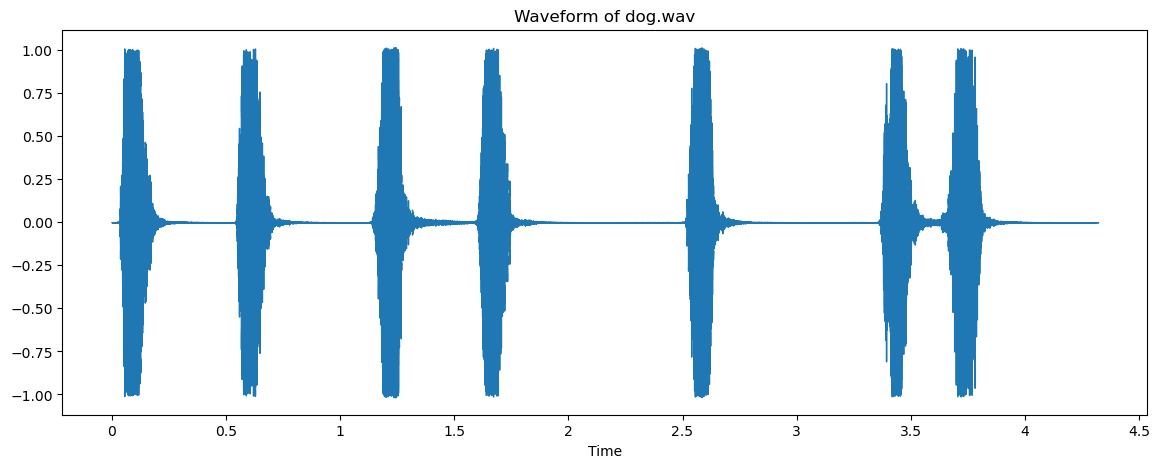

In [6]:
#Dog sound checking
data, sample_rate = librosa.load(filename)

plt.figure(figsize=(14, 5))
librosa.display.waveshow(data, sr=sample_rate)
plt.title("Waveform of dog.wav")
plt.show()

ipd.Audio(filename)

In [7]:
sample_rate

22050

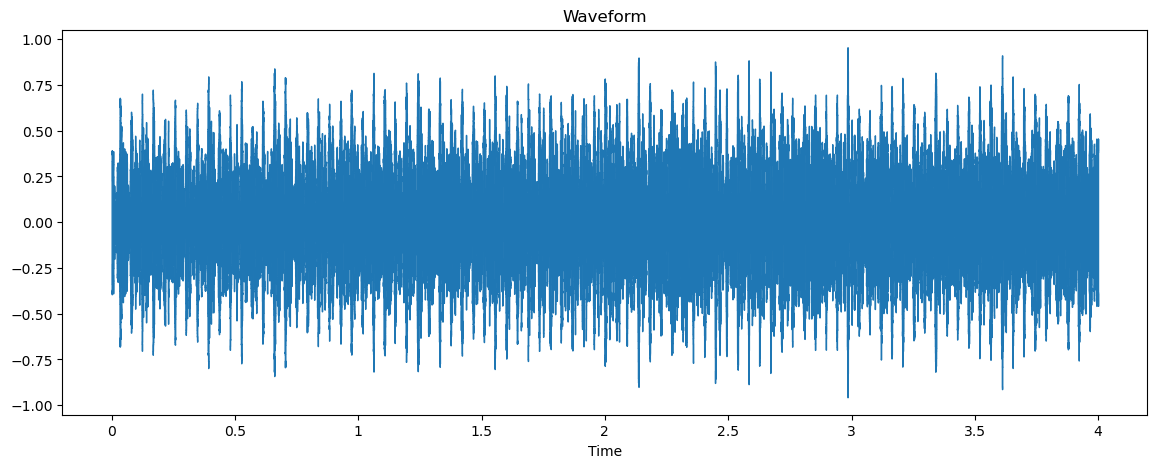

In [8]:
##sound to see waveform
filename = '6988-5-0-2.wav'
data, sample_rate = librosa.load(filename)

plt.figure(figsize=(14, 5))
librosa.display.waveshow(data, sr=sample_rate)   # ← new function
plt.title("Waveform")
plt.show()

ipd.Audio(filename)

In [9]:
import IPython.display as ipd

ipd.Audio("dog.wav")

In [10]:
data

array([0.22105733, 0.31147373, 0.26495025, ..., 0.4503034 , 0.42876196,
       0.4496042 ], dtype=float32)

In [11]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio=wav.read(filename)
wave_sample_rate

44100

In [12]:
import pandas as pd

metadata=pd.read_csv('UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [13]:
### Check whether the dataset is imbalanced
metadata['class'].value_counts()

class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64

In [14]:
# preprocessing

In [15]:
### Let's read a sample audio using librosa
import librosa
audio_file_path= '6988-5-0-2.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [16]:
print(librosa_audio_data)

[0.22105733 0.31147373 0.26495025 ... 0.4503034  0.42876196 0.4496042 ]


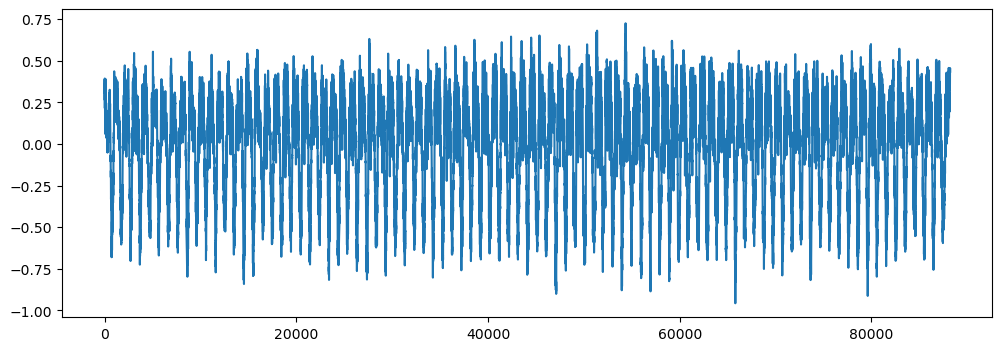

In [17]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [18]:
#Observation
#Here Librosa converts the signal to mono, meaning the channel will alays be 1

In [19]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 
wave_audio

array([[10489,  9151],
       [ 9553,  9744],
       [ 8660, 10220],
       ...,
       [11117, 17460],
       [10920, 17062],
       [10583, 16556]], dtype=int16)

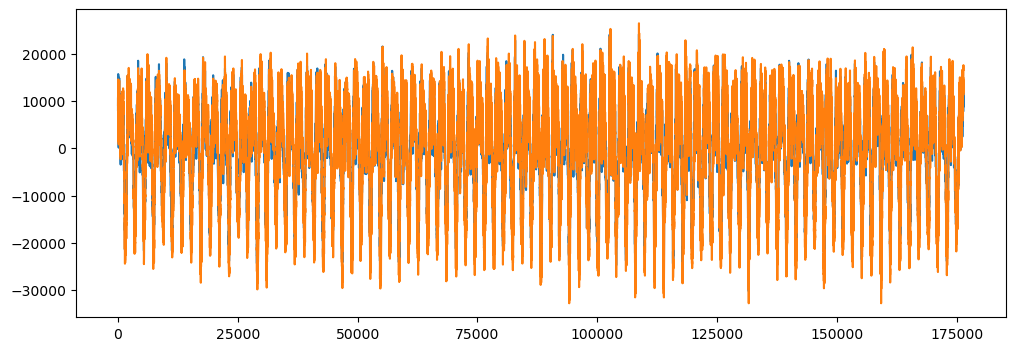

In [20]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

In [21]:
#Extract Features
#Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [22]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [23]:
mfccs

array([[-1.22906883e+02, -1.23734085e+02, -1.22381920e+02, ...,
        -1.11095215e+02, -1.01832664e+02, -8.14414215e+01],
       [ 1.25124786e+02,  1.40966064e+02,  1.48583862e+02, ...,
         1.68579376e+02,  1.45028687e+02,  1.21862885e+02],
       [-1.48540745e+01, -2.71234093e+01, -3.62249222e+01, ...,
        -3.64198990e+01, -2.22964745e+01, -2.85062456e+00],
       ...,
       [ 4.95576286e+00,  7.52594948e+00,  6.70003366e+00, ...,
         1.79093051e+00,  2.90842509e+00,  2.79876757e+00],
       [ 3.84046459e+00,  4.03901100e+00,  5.14087534e+00, ...,
         7.73882270e-02, -6.34974957e-01,  1.21690392e+00],
       [ 6.68846941e+00,  3.62380481e+00,  6.81478691e+00, ...,
        -1.38812518e+00,  2.18823814e+00,  3.01466799e+00]], dtype=float32)

In [24]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path = r"C:\Users\Kritika\OneDrive\Desktop\curbansound8k\archive"
                    
csv_path = r"C:\Users\Kritika\OneDrive\Desktop\curbansound8k\archive\UrbanSound8K.csv"

metadata = pd.read_csv(csv_path)
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [25]:
def features_extractor(file):
    if not os.path.exists(file):     # ⛔ Skip if file removed
        return None

    try:
        audio, sample_rate = librosa.load(file, sr=None, mono=True, res_type='kaiser_fast')
        mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
        return mfccs_scaled_features

    except Exception as e:
        return None



In [26]:
import numpy as np
from tqdm import tqdm

extracted_features = []

for index_num, row in tqdm(metadata.iterrows(), total=len(metadata)):
    file_name = os.path.join(audio_dataset_path, 'fold' + str(row["fold"]), str(row["slice_file_name"]))
    final_class_label = row["class"]

    data = features_extractor(file_name)
    if data is not None:
        extracted_features.append([data, final_class_label])


100%|████████████████████████████████████████████████████████████████████████████| 8732/8732 [00:02<00:00, 3382.63it/s]


In [27]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-57.498325, 107.99277, 9.555925, 20.104128, 1...",engine_idling
1,"[-53.07816, 108.17323, 9.94736, 20.47864, 16.4...",engine_idling
2,"[-54.867085, 108.42585, 9.986837, 20.182028, 1...",engine_idling
3,"[-372.78036, 166.11667, -42.02003, 16.10017, -...",children_playing
4,"[-413.66458, 116.99893, -81.30154, 52.28018, -...",drilling


In [28]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())
X.shape

(74, 40)

In [29]:
y

array(['engine_idling', 'engine_idling', 'engine_idling',
       'children_playing', 'drilling', 'drilling', 'street_music',
       'street_music', 'street_music', 'street_music', 'street_music',
       'street_music', 'children_playing', 'children_playing',
       'children_playing', 'street_music', 'car_horn', 'dog_bark',
       'dog_bark', 'dog_bark', 'dog_bark', 'dog_bark', 'dog_bark',
       'dog_bark', 'dog_bark', 'dog_bark', 'dog_bark', 'dog_bark',
       'dog_bark', 'dog_bark', 'dog_bark', 'drilling', 'drilling',
       'drilling', 'drilling', 'street_music', 'street_music',
       'street_music', 'street_music', 'street_music', 'street_music',
       'children_playing', 'children_playing', 'children_playing',
       'children_playing', 'car_horn', 'engine_idling', 'engine_idling',
       'engine_idling', 'engine_idling', 'engine_idling', 'engine_idling',
       'gun_shot', 'gun_shot', 'gun_shot', 'gun_shot', 'gun_shot',
       'gun_shot', 'gun_shot', 'dog_bark', 'dog_bark', 'd

In [30]:
#!pip install tensorflow --upgrade













In [31]:
import sys
print(sys.executable)


C:\Users\Kritika\anaconda3\python.exe


In [32]:
# from sklearn.preprocessing import LabelEncoder
# from tensorflow.keras.utils import to_categorical

# le = LabelEncoder()
# y = le.fit_transform(y)
# y = to_categorical(y)
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [33]:
y

array([[0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
 

In [34]:
import sys
print(sys.executable)

C:\Users\Kritika\anaconda3\python.exe


In [35]:
import tensorflow as tf
print(tf.__version__)


2.12.0


In [36]:
y

array([[0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
 

In [37]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [38]:
X_train

array([[-2.8918741e+02,  1.6775945e+02, -2.7404743e+01, ...,
        -1.9119158e+00,  2.4160371e+00, -3.8116643e+00],
       [-4.4282858e+02,  1.4560434e+02,  4.3100571e+01, ...,
        -6.6647120e+00, -3.6527827e+00,  2.2479122e+00],
       [-1.7745982e+02,  2.0412428e+02, -2.8480356e+01, ...,
         1.9611683e-01,  5.5837071e-01,  1.3866017e+00],
       ...,
       [-2.2632253e+02,  4.8528973e+01,  6.9831039e+01, ...,
         3.8767595e+00, -3.6898782e+00,  5.0628386e+00],
       [-1.8980084e+02,  2.0166920e+02, -2.6468416e+01, ...,
         1.7786149e+00,  8.5049748e-01,  9.9795711e-01],
       [-2.0706061e+02,  1.1879593e+02, -4.7931332e+01, ...,
        -3.1377270e+00, -4.0475335e+00, -3.6865616e+00]], dtype=float32)

In [39]:
X_train.shape

(59, 40)

In [40]:
X_test.shape

(15, 40)

In [41]:
y_train.shape


(59, 7)

In [42]:
y_test.shape

(15, 7)

In [43]:
y.shape

(74, 7)

# Model Creation

In [44]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [46]:
### No of classes
num_labels=y.shape[1]

In [47]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [49]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')


In [50]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
1/2 [==============>...............] - ETA: 1s - loss: 50.6529 - accuracy: 0.1875
Epoch 1: val_loss improved from inf to 28.22635, saving model to saved_models\audio_classification.hdf5
2/2 [==============================] - 2s 377ms/step - loss: 53.3262 - accuracy: 0.1695 - val_loss: 28.2263 - val_accuracy: 0.1333
Epoch 2/100
1/2 [==============>...............] - ETA: 0s - loss: 44.6005 - accuracy: 0.1875
Epoch 2: val_loss improved from 28.22635 to 17.23767, saving model to saved_models\audio_classification.hdf5
2/2 [==============================] - 0s 73ms/step - loss: 44.0666 - accuracy: 0.2034 - val_loss: 17.2377 - val_accuracy: 0.1333
Epoch 3/100
1/2 [==============>...............] - ETA: 0s - loss: 49.1869 - accuracy: 0.1562
Epoch 3: val_loss improved from 17.23767 to 8.56791, saving model to saved_models\audio_classification.hdf5
2/2 [==============================] - 0s 79ms/step - loss: 46.4229 - accuracy: 0.1186 - val_loss: 8.5679 - val_accuracy: 0.2000
Epoch 4

Epoch 27/100
1/2 [==============>...............] - ETA: 0s - loss: 11.7868 - accuracy: 0.3438
Epoch 27: val_loss did not improve from 1.28068
2/2 [==============================] - 0s 44ms/step - loss: 11.4952 - accuracy: 0.2712 - val_loss: 1.3373 - val_accuracy: 0.4667
Epoch 28/100
1/2 [==============>...............] - ETA: 0s - loss: 11.1665 - accuracy: 0.1250
Epoch 28: val_loss did not improve from 1.28068
2/2 [==============================] - 0s 41ms/step - loss: 12.3475 - accuracy: 0.2203 - val_loss: 1.3762 - val_accuracy: 0.4667
Epoch 29/100
1/2 [==============>...............] - ETA: 0s - loss: 11.4417 - accuracy: 0.4375
Epoch 29: val_loss did not improve from 1.28068
2/2 [==============================] - 0s 43ms/step - loss: 11.9898 - accuracy: 0.3220 - val_loss: 1.3900 - val_accuracy: 0.5333
Epoch 30/100
1/2 [==============>...............] - ETA: 0s - loss: 10.5118 - accuracy: 0.1875
Epoch 30: val_loss did not improve from 1.28068
2/2 [==============================] - 0s

1/2 [==============>...............] - ETA: 0s - loss: 5.3389 - accuracy: 0.1562
Epoch 57: val_loss did not improve from 1.28068
2/2 [==============================] - 0s 47ms/step - loss: 5.5531 - accuracy: 0.2542 - val_loss: 1.5888 - val_accuracy: 0.5333
Epoch 58/100
1/2 [==============>...............] - ETA: 0s - loss: 5.9619 - accuracy: 0.1875
Epoch 58: val_loss did not improve from 1.28068
2/2 [==============================] - 0s 48ms/step - loss: 4.9923 - accuracy: 0.2203 - val_loss: 1.5990 - val_accuracy: 0.5333
Epoch 59/100
1/2 [==============>...............] - ETA: 0s - loss: 5.2377 - accuracy: 0.3125
Epoch 59: val_loss did not improve from 1.28068
2/2 [==============================] - 0s 48ms/step - loss: 5.5802 - accuracy: 0.3220 - val_loss: 1.6093 - val_accuracy: 0.5333
Epoch 60/100
1/2 [==============>...............] - ETA: 0s - loss: 5.3489 - accuracy: 0.2500
Epoch 60: val_loss did not improve from 1.28068
2/2 [==============================] - 0s 49ms/step - loss: 5

2/2 [==============================] - 0s 48ms/step - loss: 3.1007 - accuracy: 0.3559 - val_loss: 1.6946 - val_accuracy: 0.4667
Epoch 88/100
1/2 [==============>...............] - ETA: 0s - loss: 4.4870 - accuracy: 0.2188
Epoch 88: val_loss did not improve from 1.28068
2/2 [==============================] - 0s 46ms/step - loss: 3.8436 - accuracy: 0.2542 - val_loss: 1.7029 - val_accuracy: 0.4667
Epoch 89/100
1/2 [==============>...............] - ETA: 0s - loss: 2.7516 - accuracy: 0.3125
Epoch 89: val_loss did not improve from 1.28068
2/2 [==============================] - 0s 45ms/step - loss: 3.2341 - accuracy: 0.3390 - val_loss: 1.7098 - val_accuracy: 0.4667
Epoch 90/100
1/2 [==============>...............] - ETA: 0s - loss: 3.0553 - accuracy: 0.3438
Epoch 90: val_loss did not improve from 1.28068
2/2 [==============================] - 0s 44ms/step - loss: 3.3604 - accuracy: 0.3559 - val_loss: 1.7155 - val_accuracy: 0.4667
Epoch 91/100
1/2 [==============>...............] - ETA: 0s - 

In [51]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.20000000298023224


In [52]:
filename = "dog.wav"

# extract features
prediction_feature = features_extractor(filename)

# reshape to (1, 40)
prediction_feature = prediction_feature.reshape(1, -1)

# predict
prediction = model.predict(prediction_feature)

# get class index
predicted_class = np.argmax(prediction, axis=1)

predicted_class


1/1 [==============================] - 0s 143ms/step


array([2], dtype=int64)

In [53]:
metadata['class'].unique()

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

In [54]:
X_test[1]

array([-1.2453703e+02,  7.9893814e+01, -2.2596239e+01,  4.3275700e+01,
       -2.4071339e+01,  1.7424240e+01, -8.0121298e+00,  1.5457557e+01,
       -1.8251293e+00,  1.2127909e+01, -2.0768933e+00,  7.9092503e+00,
       -2.6561685e+00,  3.1321921e+00, -2.2859010e-01,  4.4884214e+00,
        1.0790477e+00, -7.2107837e-02, -3.7773957e+00, -7.3746747e-01,
       -2.6940975e+00,  2.2805771e-01, -2.5515792e+00,  5.6952906e-01,
       -1.6496334e+00,  1.6421778e+00, -1.4107802e+00,  5.4481936e-01,
       -4.0654477e-01,  4.1037551e-01, -5.4663408e-01,  6.1477607e-01,
       -1.3355222e+00,  3.2607144e-01,  4.5489633e-01,  7.2487342e-01,
       -4.8965478e-01, -1.2604015e+00, -1.4872206e+00, -3.9684117e-02],
      dtype=float32)

In [55]:
model.predict_classes(X_test)

AttributeError: 'Sequential' object has no attribute 'predict_classes'

# Testing Some Test Audio Data
Steps

Preprocess the new audio data
predict the classes
Invere transform your Predicted Label

In [59]:
filename = "14387-9-0-11.wav"

# Load audio
audio, sample_rate = librosa.load(filename, sr=None, res_type='kaiser_fast')

# Extract MFCC
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

# Reshape for model
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)

# Predict using TensorFlow 2.12+
prediction = model.predict(mfccs_scaled_features)

# Get predicted class index
predicted_label = np.argmax(prediction, axis=1)

# Convert index to class name
prediction_class = labelencoder.inverse_transform(predicted_label)

print("Predicted class:", prediction_class[0])

1/1 [==============================] - 0s 29ms/step
Predicted class: engine_idling


In [57]:
filename = "518-4-0-2.wav"

# Load audio
audio, sample_rate = librosa.load(filename, sr=None, res_type='kaiser_fast')

# Extract MFCC
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

# Reshape for model
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)

# Predict using TensorFlow 2.12+
prediction = model.predict(mfccs_scaled_features)

# Get predicted class index
predicted_label = np.argmax(prediction, axis=1)

# Convert index to class name
prediction_class = labelencoder.inverse_transform(predicted_label)

print("Predicted class:", prediction_class[0])

1/1 [==============================] - 0s 25ms/step
Predicted class: engine_idling


In [58]:
import os

folder = r"C:\Users\Kritika\OneDrive\Desktop\curbansound8k\archive"

def get_file_size(file_path):
    size_bytes = os.path.getsize(file_path)
    size_kb = size_bytes / 1024
    size_mb = size_kb / 1024
    return size_kb, size_mb

print("Original audio file sizes:\n")

for filename in os.listdir(folder):
    if filename.endswith(".wav"):
        path = os.path.join(folder, filename)
        kb, mb = get_file_size(path)
        print(f"{filename}: {kb:.2f} KB ({mb:.2f} MB)")


Original audio file sizes:

6508-9-1-0.wav: 689.11 KB (0.67 MB)
